## Problem Statement

"This dataset consists of tv shows and movies available on 
Netflix as of 2019. The dataset is collected from 
Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting 
report which shows that the number of TV 
shows on Netflix has nearly tripled since 2010. 
The streaming service’s number of movies has 
decreased by more than 2,000 titles since 2010, 
while its number of TV shows has nearly tripled. 
It will be interesting to explore what all other 
insights can be obtained from the same dataset.

Integrating this dataset with other external 
datasets such as IMDB ratings, rotten 
tomatoes can also provide many interesting findings.</p>

Inspiration
Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Is Netflix has increasingly focusing on TV rather than movies in recent years."




## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    

### Step 1: Importing the Relevant Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import datetime as dt


### Step 2: Data Inspection

In [3]:
movie = pd.read_csv("netflix_titles_nov_2019.csv")

In [4]:
movie.shape

(5837, 12)

* __We have 5837 rows and 12 columns in dataset.__

### Checking Information of Dataset

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


### Data Cleaning

In [6]:
#ratio of null values
movie.isnull().sum()/movie.shape[0] *100

show_id          0.000000
title            0.000000
director        32.568100
cast             9.525441
country          7.315402
date_added      10.998801
release_year     0.000000
rating           0.171321
duration         0.000000
listed_in        0.000000
description      0.000000
type             0.000000
dtype: float64

The Date_Added was a string, it shall be the date-time format. so lets change it in date-time format

In [7]:
movie["date_added"]=movie["date_added"].str.replace(",", "").str.strip() ## Strip removes spaces front and back
movie["date_added"]=pd.to_datetime(movie["date_added"], format="%B %d %Y")

Lots of NA in the director column, I changed for "Unknown". It does not make sense to delete all rows, as for most of the movies, directors were not mentioned. similarly for cast and country columns



In [8]:
movie["director"]=movie["director"].fillna("Unknown")
movie["cast"]=movie["cast"].fillna("Unknown")
movie["country"]=movie["country"].fillna("Unknown")

I did not like the Duration column, as it contained Seasons and minutes, so I separated the season and minutes and deleted season from duration



In [9]:
movie["Season"]=""
columns_name=["show_id", "type", "title", 
              "director", "cast", "country",
              "date_added", "release_year", "rating",
              "duration", "Season", "listed_in", "description"]
movie=movie.reindex(columns=columns_name)

We want season column after duration column so we are reindexing the dataset

In [10]:
movie["Season"] = movie[movie["duration"].str.contains("Season")]["duration"] ## Separating Season from duration

In [11]:
movie["Season"]=movie["Season"].fillna("0")
movie["Season"]=movie["Season"].str.replace("Season", "").str.replace("s", "")
movie["Season"]=movie["Season"].astype(str).astype(int)

In [12]:
## Make a duration column an Integer
movie["duration"]=movie.duration.str.replace('^(\d+)(.Seasons*)$', "0") ## Remove The Season from the column
movie["duration"]=movie["duration"].str.replace(" min", "") ## Remove min
movie["duration"]=movie["duration"].astype(int) ## Convert to Integer

In [13]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
0,81193313,TV Show,Chocolate,Unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,0,1,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...
1,81197050,Movie,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,2019-11-30,2019,TV-G,67,0,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor..."
2,81213894,Movie,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...
3,81082007,Movie,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru..."
4,80213643,TV Show,Chip and Potato,Unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,0,2,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne..."


In [14]:
movie.isna().sum()     ##After all cleaning, there is not so much of left NAs.

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      642
release_year      0
rating           10
duration          0
Season            0
listed_in         0
description       0
dtype: int64

In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   type          5837 non-null   object        
 2   title         5837 non-null   object        
 3   director      5837 non-null   object        
 4   cast          5837 non-null   object        
 5   country       5837 non-null   object        
 6   date_added    5195 non-null   datetime64[ns]
 7   release_year  5837 non-null   int64         
 8   rating        5827 non-null   object        
 9   duration      5837 non-null   int32         
 10  Season        5837 non-null   int32         
 11  listed_in     5837 non-null   object        
 12  description   5837 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 547.3+ KB


### Checking duplicate values

In [16]:
movie.duplicated().sum()

0

Zero duplicates in dataset

## EDA

### Movies and Tvshows in this dataset

In [17]:
data=movie['type'].value_counts()
data


Movie      3939
TV Show    1898
Name: type, dtype: int64

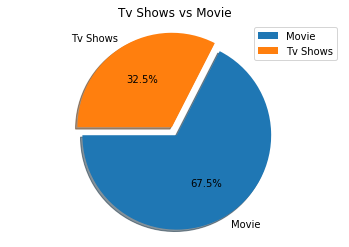

In [18]:
myexplode = [0,0.1]
mylables=['Movie','Tv Shows']
plt.pie(data, labels=mylables,autopct='%1.1f%%', explode = myexplode, shadow = True,startangle=180)
plt.axis('equal')
plt.title('Tv Shows vs Movie')
plt.legend()
plt.show()

In netflix dataset there are 32.5% Tv shows and 67.5% movies available.

### top 15 countries which produces the most content

In [19]:
movie.country.nunique()

528

Here we have 528 unique values in country column so we wil take top 15 countries which produces the most content

In [20]:
country=movie['country'].value_counts().head(15)
country

United States     1907
India              697
Unknown            427
United Kingdom     336
Japan              168
Canada             139
South Korea        133
Spain              113
France              85
Mexico              80
Turkey              78
Australia           69
Taiwan              68
Hong Kong           51
Thailand            50
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

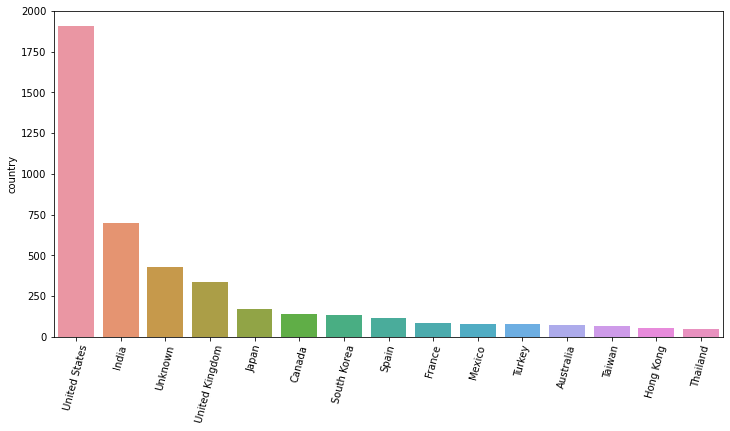

In [21]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(country.index,country)

United States produces highest content followed by india second highest. 

### Top15 Genres

In [22]:
genre = movie['listed_in'].value_counts().head(15)
genre

Documentaries                                        297
Stand-Up Comedy                                      265
Dramas, International Movies                         238
Dramas, Independent Movies, International Movies     170
Comedies, Dramas, International Movies               157
Kids' TV                                             153
Documentaries, International Movies                  147
Children & Family Movies                             115
Comedies, International Movies                       113
Children & Family Movies, Comedies                   110
Action & Adventure, Dramas, International Movies      96
Dramas, International Movies, Romantic Movies         95
Crime TV Shows, International TV Shows, TV Dramas     91
International TV Shows, TV Dramas                     88
Comedies, International Movies, Romantic Movies       87
Name: listed_in, dtype: int64

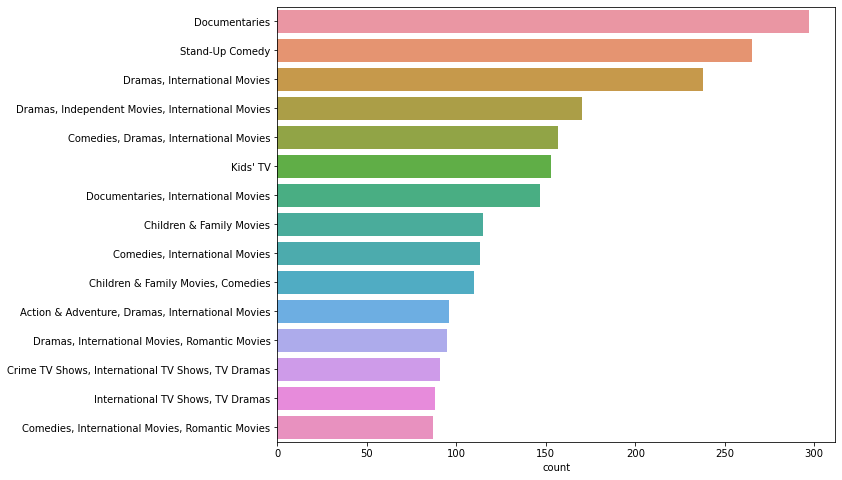

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(genre,genre.index)
plt.ylabel(None);
plt.xlabel('count');

Highest numbers of Documentaries are there followed by Stand-Up Comedy in terms of Genres.

### Understanding what content is available in different countries

In [24]:
content_US=movie[movie["country"]=="United States"]

In [25]:
content_us_count=content_US.groupby(['listed_in'],as_index=False).agg(us_count=('listed_in',"count")).sort_values('us_count',ascending=[False]).head(5)
content_us_count


,listed_in,us_count
138,Documentaries,201
230,Stand-Up Comedy,173
40,Children & Family Movies,60
43,"Children & Family Movies, Comedies",54
203,Kids' TV,54


In [26]:
content_India=movie[movie["country"]=="India"]

In [27]:
content_India_count=content_India.groupby(['listed_in'],as_index=False).agg(India_count=('listed_in',"count")).sort_values('India_count',ascending=[False]).head(5)
content_India_count

,listed_in,India_count
41,"Dramas, International Movies",98
20,"Comedies, Dramas, International Movies",75
40,"Dramas, Independent Movies, International Movies",74
4,"Action & Adventure, Dramas, International Movies",51
44,"Dramas, International Movies, Romantic Movies",38


In [28]:
content_UnitedKingdom=movie[movie["country"]=="United Kingdom"]

In [29]:
content_UnitedKingdom_count= content_UnitedKingdom.groupby(['listed_in'],as_index=False).agg(uk_count=('listed_in',"count")).sort_values('uk_count',ascending=[False]).head(5)
content_UnitedKingdom_count

,listed_in,uk_count
48,Documentaries,37
15,"British TV Shows, Docuseries, International TV...",25
50,"Documentaries, International Movies",17
17,"British TV Shows, Docuseries, Science & Nature TV",17
19,"British TV Shows, International TV Shows, Real...",17


Text(0.5, 1.0, 'Most available content in UK')

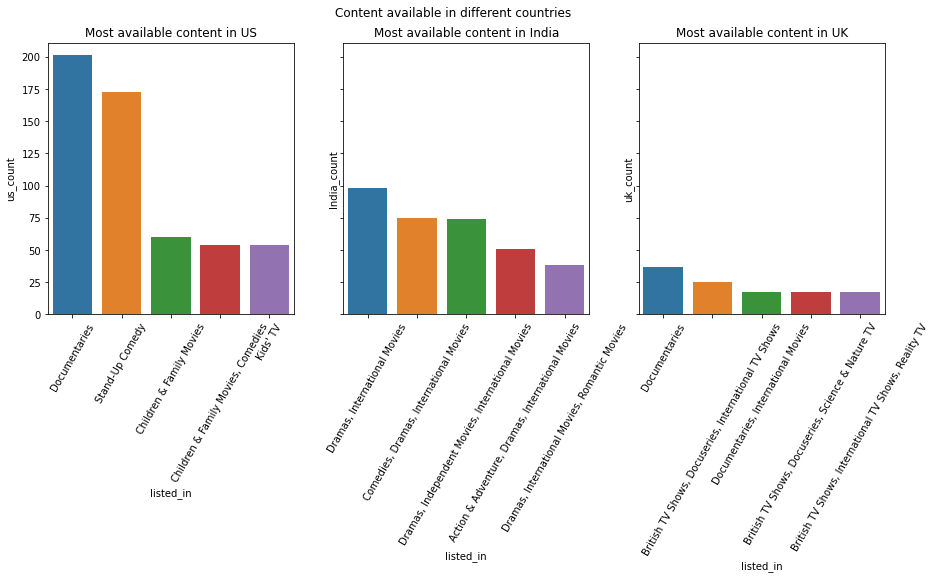

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Content available in different countries')

# us
df22=sns.barplot (ax=axes[0], x=content_us_count['listed_in'], y=content_us_count['us_count'])
df22.set_xticklabels(df22.get_xticklabels(),rotation = 60)
axes[0].set_title("Most available content in US")


# india
df32=sns.barplot(ax=axes[1], x=content_India_count['listed_in'], y=content_India_count['India_count'])
df32.set_xticklabels(df32.get_xticklabels(),rotation = 60)
axes[1].set_title("Most available content in India")


# uk
df42=sns.barplot(ax=axes[2], x=content_UnitedKingdom_count['listed_in'], y=content_UnitedKingdom_count['uk_count'])
df42.set_xticklabels(df42.get_xticklabels(),rotation = 60)
axes[2].set_title("Most available content in UK")


### Movies and Tvshows are released per year

In [31]:
per_year = movie['release_year'].value_counts().head(10)
per_year

2018    1040
2017     928
2016     818
2019     762
2015     502
2014     281
2013     232
2012     174
2010     137
2011     127
Name: release_year, dtype: int64

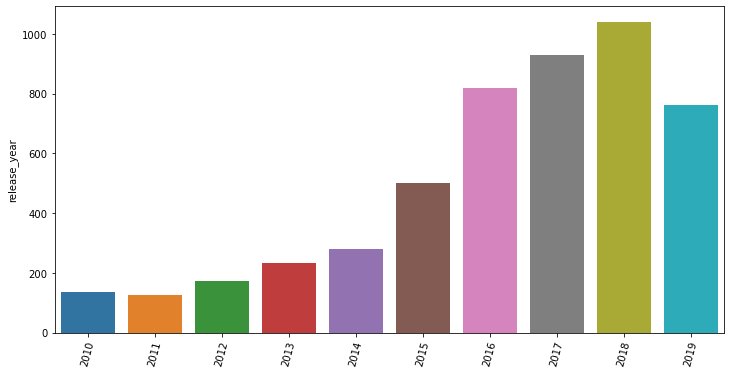

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(per_year.index, per_year);


### Tv Shows before 2010

In [33]:
tvshows_before_2010=movie.loc[(movie["release_year"] <= 2010) & (movie['type']=='TV Show')]
len(tvshows_before_2010)


189

 There are 189 tv shows streamed before 2010

### Tv shows after 2010

In [34]:
tvshows_after_2010=movie.loc[(movie["release_year"] > 2010) & (movie['type']=='TV Show')]
len(tvshows_after_2010)

1709

 There are 1709 tv shows streamed after 2010

### How many times Tv show increase after 2010 ?

In [35]:
increasing_tvshow_rate= len(tvshows_after_2010)/len(tvshows_before_2010)
increasing_tvshow_rate

9.042328042328043

 From the above insight we can say that near about 9 times the Tv shows are increased after 2010

### Movies before 2010


In [36]:
movie_before_2010=movie.loc[(movie["release_year"] <= 2010) & (movie['type']=='Movie')]
len(movie_before_2010)

783

### Movies after 2010

In [37]:
movies_after_2010=movie.loc[(movie["release_year"] > 2010) & (movie['type']=='Movie')]
len(movies_after_2010)

3156

### How many times Tv show increase after 2010 ?

In [38]:
increasing_movie_rate= len(movies_after_2010)/len(movie_before_2010)
increasing_movie_rate

4.030651340996169

 From the above insight we can say that near about 4 times the movies are increased after 2010

### What are the netflix movies and tvshows ratings


In [39]:
netflixmovies = movie[movie.type=='Movie']
netflix_tvshows = movie[movie.type=='TV Show']

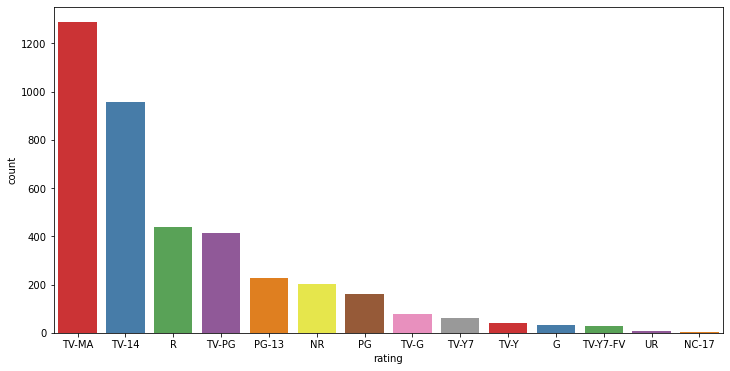

In [40]:
## Netflix movie rating
plt.figure(figsize=(12,6))
m = sns.countplot(x='rating',data=netflixmovies,palette='Set1',order=netflixmovies.rating.value_counts().index[0:15])

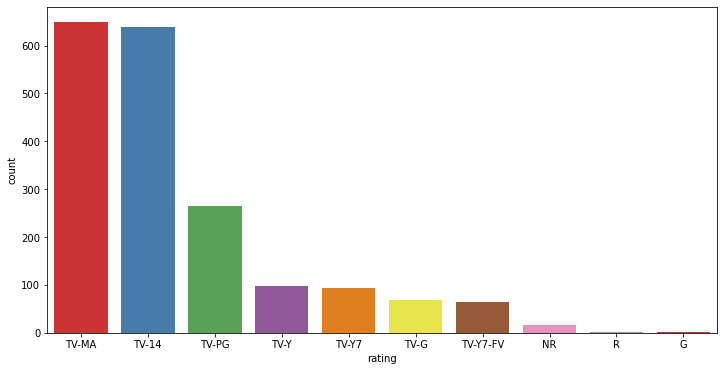

In [41]:
## Netflix tvshows rating
plt.figure(figsize=(12,6))
m = sns.countplot(x='rating',data=netflix_tvshows,palette='Set1',order=netflix_tvshows.rating.value_counts().index[0:15])

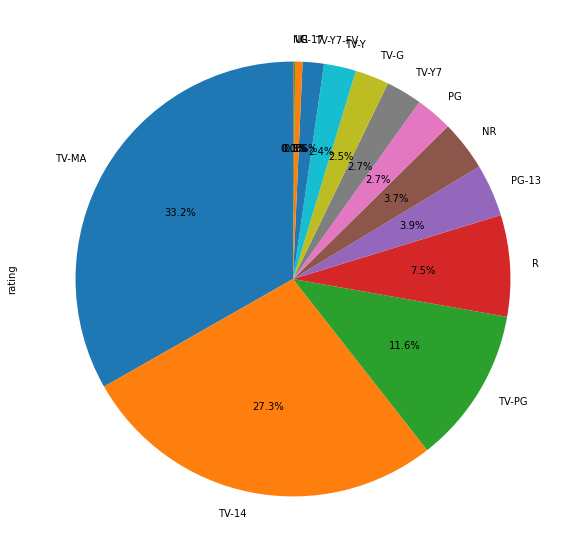

In [42]:
## Overall ratings
plt.figure(figsize=(15,10))
movie.rating.value_counts().plot.pie(autopct='%1.1f%%',startangle=90);

The top3 ratings are TV-MA, TV-14, TV-PG with 32.6%, 27.3%, and 11.3% respecively



### average duration of the movie

In [43]:
sort= movie["duration"]!=0
movie[sort]["duration"].median()

97.0

 The average duration of the movie is 97 minutes



### maximum duration of the movie

In [44]:
movie["duration"].max() 


312

In [45]:
movie[movie["duration"]==312]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
2160,80988062,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,0,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


The maximum duration of the movie is "Blaxk Mirror: Bandersnatch"



### tvshows has the maximum number of seasons

In [46]:
movie["Season"].max()


15

In [47]:
movie[movie["Season"]==15]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Season,listed_in,description
1109,70140391,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,NaT,2018,TV-14,0,15,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
3160,70142386,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,NaT,2017,TV-14,0,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


 "Grey's Anatomy" and "NCIS" having maximum seasons of the tv shows i.e. 15.


### year most movies are released

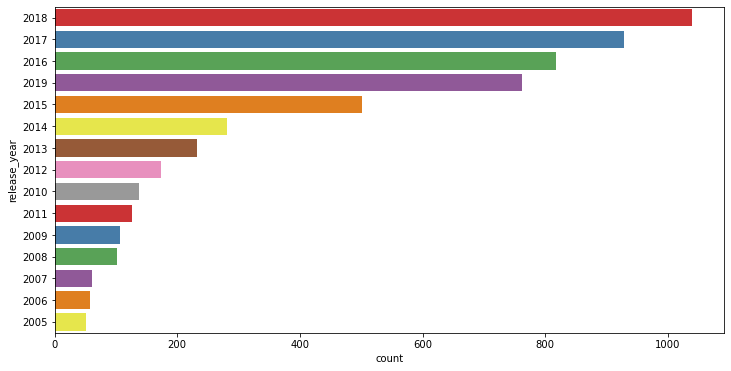

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y='release_year',data=movie,palette='Set1',order=movie['release_year'].value_counts().index[0:15]);

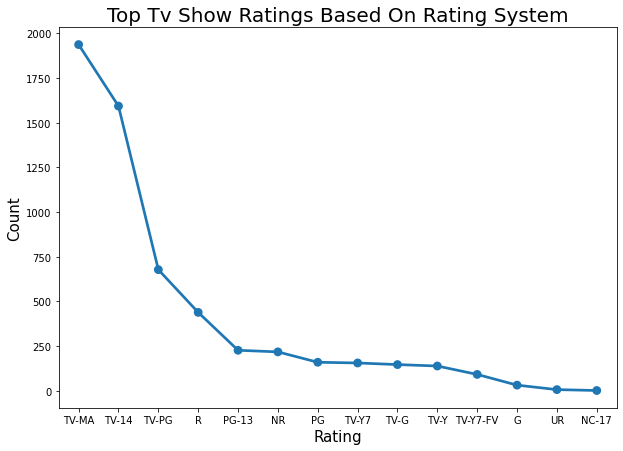

In [49]:
# Plotting the ratings on tv shows on pointplot

tvshow_ratings = movie.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims)  
sns.pointplot(x = 'rating',y = 'count',data = tvshow_ratings)
plt.xlabel('Rating', size = '15')
plt.ylabel('Count', size = '15')
plt.title('Top Tv Show Ratings Based On Rating System', size = '20')
plt.show()

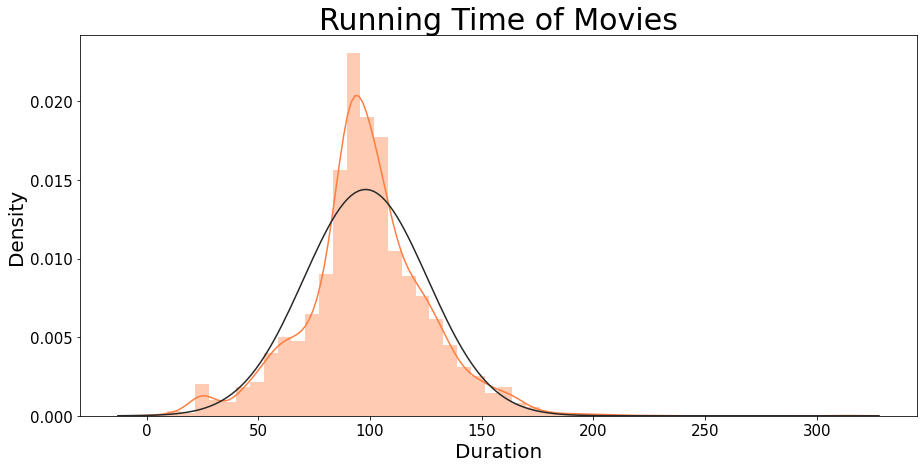

In [50]:
movie = movie[movie['type'] == 'Movie']
movie['duration'].value_counts()

# Importing Norm Distrbution 
from scipy.stats import norm

fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(movie['duration'], hist = True, color = '#FF7D40', ax = ax, fit = norm)
ax.tick_params(axis = 'x', labelsize = 15) 
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('Duration', fontsize = 20)
ax.set_ylabel('Density', fontsize = 20)
ax.set_title('Running Time of Movies', fontsize = 30);

In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


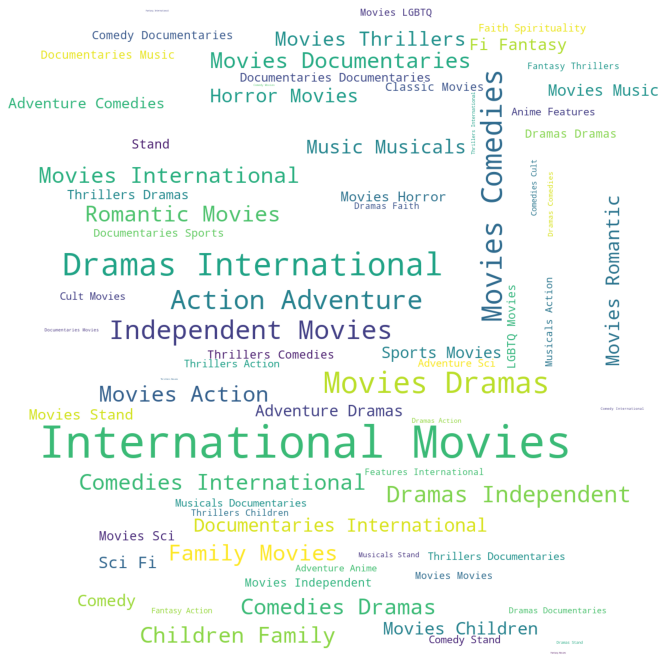

In [52]:
#Wordcloud for the same
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Inferences and Conclusion


Movie : 3939 , TV Show : 1898


On average the movie lasts 97 minutes


Maximum number of seasons in TV-Shows is 15


Mostly movies and TV-shows are made in America


TV-MA and TV-14 are the most common type of rating


## Clustering Agglomerative algorithm

In [53]:
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


### Dropping Unnessesory columns

In [54]:
movie_knn=movie.drop(['show_id','director','cast','date_added','description'],axis=1)

### Lable Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = movie_knn.select_dtypes(include='object').columns
for i in var_mod:
    movie_knn[i] = le.fit_transform(movie_knn[i])

In [56]:
movie_knn.head()

,type,title,country,release_year,rating,duration,Season,listed_in
1,0,1249,448,2019,7,67,0,159
2,0,3551,161,2019,6,135,0,118
3,0,312,128,2019,6,106,0,175
5,0,771,228,2018,6,107,0,140
6,0,1434,110,2019,8,81,0,175


### Co-relation Between the variables

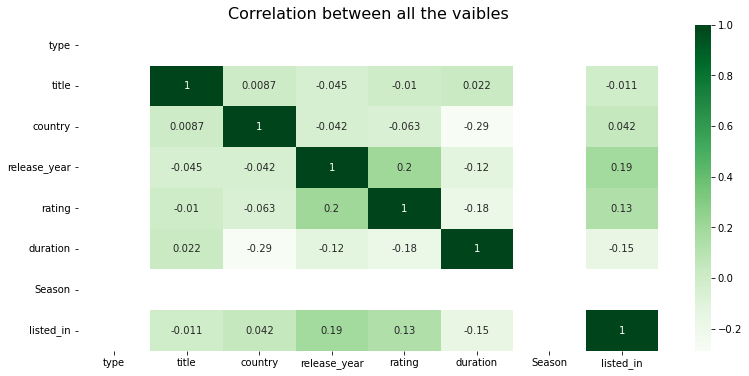

In [57]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(movie_knn.corr(), annot = True, cmap = 'Greens')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### Staderdization of data

In [58]:
# transform the data using StandardScaler
netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(movie_knn), columns = movie_knn.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
netflix_pca=pd.DataFrame(pca.fit_transform(netflix_standarized))

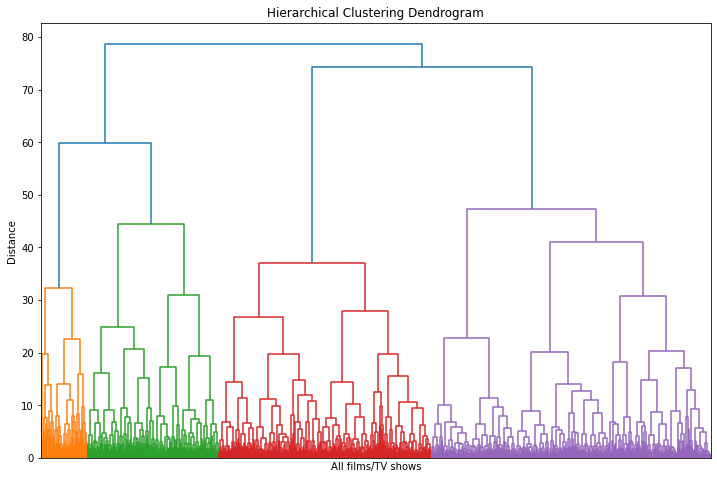

In [59]:
# we use dendrogram to get number of clusters.
distances_linkage = linkage(netflix_standarized,
                            method = 'ward', 
                            metric = 'euclidean')                      
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')
dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

Assume we cut vertical lines with a horizontal line to obtain the number of clusters. Number of clusters = 4



In [60]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(netflix_standarized)

In [62]:
y_hc

array([0, 2, 2, ..., 0, 2, 1], dtype=int64)

## Conclusion for Algorithm

#### Each level of dendrogram has a subtle meaning to the relationship between its data members. In a regular relationship chart, one may interpret that at the top lies grandparents or the first generation, the next level corresponds to parents or second generation and the final level belongs to children or third generation. Likewise, in every branching procedure of dendrogram, all the data points having the membership at each level belongs to a certain class.




#### In this algorithm, we start with considering each data point as a subcluster. We define a metric to measure the distance between all pairs of subclusters at each step and keep merging the nearest two subclusters in each step. We repeat this procedure till there is only one cluster in the system.
